In [20]:
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [3]:
boston = datasets.load_boston()

In [6]:
# print(boston.DESCR)
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [9]:
x = boston.data[:, 5]
y = boston.target
print(x.shape)
print(y.shape)

(506,)
(506,)


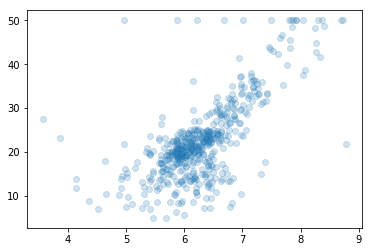

In [12]:
plt.scatter(x,y, alpha=0.2 )

In [13]:
np.max(y)

50.0

In [14]:
x = x[y<50.0]
y = y[y<50.0]

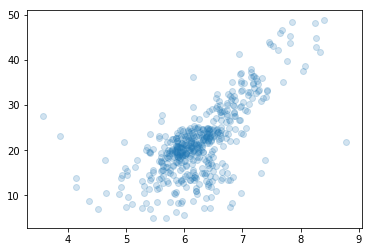

In [16]:
plt.scatter(x,y, alpha=0.2 )
plt.show()

In [26]:
class SimpleLinearRegression1:

    def __init__(self):
        """初始化Simple Linear Regression 模型"""
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        """根据训练数据集x_train,y_train训练Simple Linear Regression模型"""
        assert x_train.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert len(x_train) == len(y_train), \
            "the size of x_train must be equal to the size of y_train"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        num = 0.0
        d = 0.0
        for x, y in zip(x_train, y_train):
            num += (x - x_mean) * (y - y_mean)
            d += (x - x_mean) ** 2

        self.a_ = num / d
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        """给定待预测数据集x_predict，返回表示x_predict的结果向量"""
        assert x_predict.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert self.a_ is not None and self.b_ is not None, \
            "must fit before predict!"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        """给定单个待预测数据x，返回x的预测结果值"""
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearRegression1()"


class SimpleLinearRegression2:

    def __init__(self):
        """初始化Simple Linear Regression模型"""
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        """根据训练数据集x_train,y_train训练Simple Linear Regression模型"""
        assert x_train.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert len(x_train) == len(y_train), \
            "the size of x_train must be equal to the size of y_train"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / (x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        """给定待预测数据集x_predict，返回表示x_predict的结果向量"""
        assert x_predict.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert self.a_ is not None and self.b_ is not None, \
            "must fit before predict!"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        """给定单个待预测数据x_single，返回x_single的预测结果值"""
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearRegression2()"


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [27]:
reg = SimpleLinearRegression2()
reg.fit(x_train, y_train)

SimpleLinearRegression2()

In [28]:
reg.a_

8.05250624078528

In [29]:
reg.b_

-28.580436302782935

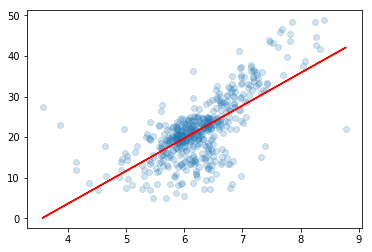

In [30]:
plt.scatter(x,y, alpha=0.2 )
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [31]:
y_predict = reg.predict(x_test)

# MSE

In [32]:
mse_test = np.sum((y_predict - y_test) **2)/len(y_test)

In [33]:
print(mse_test)

32.455911939929614


# RMSE

In [35]:
from math import sqrt

rmse_test = sqrt(mse_test)
print(rmse_test)

5.697009034566262


# MAE

In [38]:
mae_test = np.sum(np.absolute(y_predict- y_test)) / len(y_test)

print(mae_test)

4.076993919286471


In [103]:
class LinearRegression2:

    def __init__(self):
        """初始化Simple Linear Regression 模型"""
        self.coef_ = None
        self.interception_ = None
        self._theta = None

    def fit_normal(self, X_train, y_train):
        assert X_train.shape[0] == y_train.shape[0], "the size of x_train must be equal to the size of y_train"
        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        self._theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train);
        
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]
    
        

        return self

    def predict(self, X_predict):
        assert X_predict.shape[1] == len(self.coef_), " X_predict must be equal to X_train "
        
        X_b = np.hstack([ np.ones((len(X_predict), 1)), X_predict])
        
        return X_b.dot(self._theta)
    
    def score(self, X_test, y_test):
        y_predict = self.predict(X_test)
        return self.r2_score(y_test, y_predict)
    
    def mean_squared_error(self, y_true, y_predict):
        """计算y_true和y_predict之间的MSE"""
        assert len(y_true) == len(y_predict), "the size of y_true must be equal to the size of y_predict"

        return np.sum((y_true - y_predict)**2) / len(y_true)
    def root_mean_squared_error(self, y_true, y_predict):
        """计算y_true和y_predict之间的RMSE"""

        return sqrt(self.mean_squared_error(y_true, y_predict))
    
    def mean_absolute_error(self, y_true, y_predict):
        """计算y_true和y_predict之间的MAE"""
        assert len(y_true) == len(y_predict), \
            "the size of y_true must be equal to the size of y_predict"

        return np.sum(np.absolute(y_true - y_predict)) / len(y_true)
    def r2_score(self, y_true, y_predict):
        """计算y_true和y_predict之间的R Square"""

        return 1 - self.mean_squared_error(y_true, y_predict)/np.var(y_true)
    def __repr__(self):
        return "LinearRegression1()"



In [104]:
reg3 = LinearRegression2()

In [105]:
X = boston.data
y = boston.target
print(X.shape)
print(y.shape)
X = X[y<50.0]
y = y[y<50.0]

(506, 13)
(506,)


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [107]:
reg3.fit_normal(X_train, y_train)

LinearRegression1()

In [108]:
reg3.interception_

36.50939902284037

In [109]:
reg3.coef_

array([-8.76209183e-02,  2.73247532e-02, -5.29690221e-02,  5.97077140e-01,
       -1.51405153e+01,  3.43905626e+00, -2.00151085e-02, -1.23865034e+00,
        2.59344418e-01, -1.23499259e-02, -8.64524373e-01,  6.62224144e-03,
       -3.87450929e-01])

In [110]:
reg3.score(X_test, y_test)

0.7829982949168861

In [111]:
import pandas as pd

In [112]:
dataframe = pd.DataFrame(X_train)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f11fa748f98>,
      dtype=object)

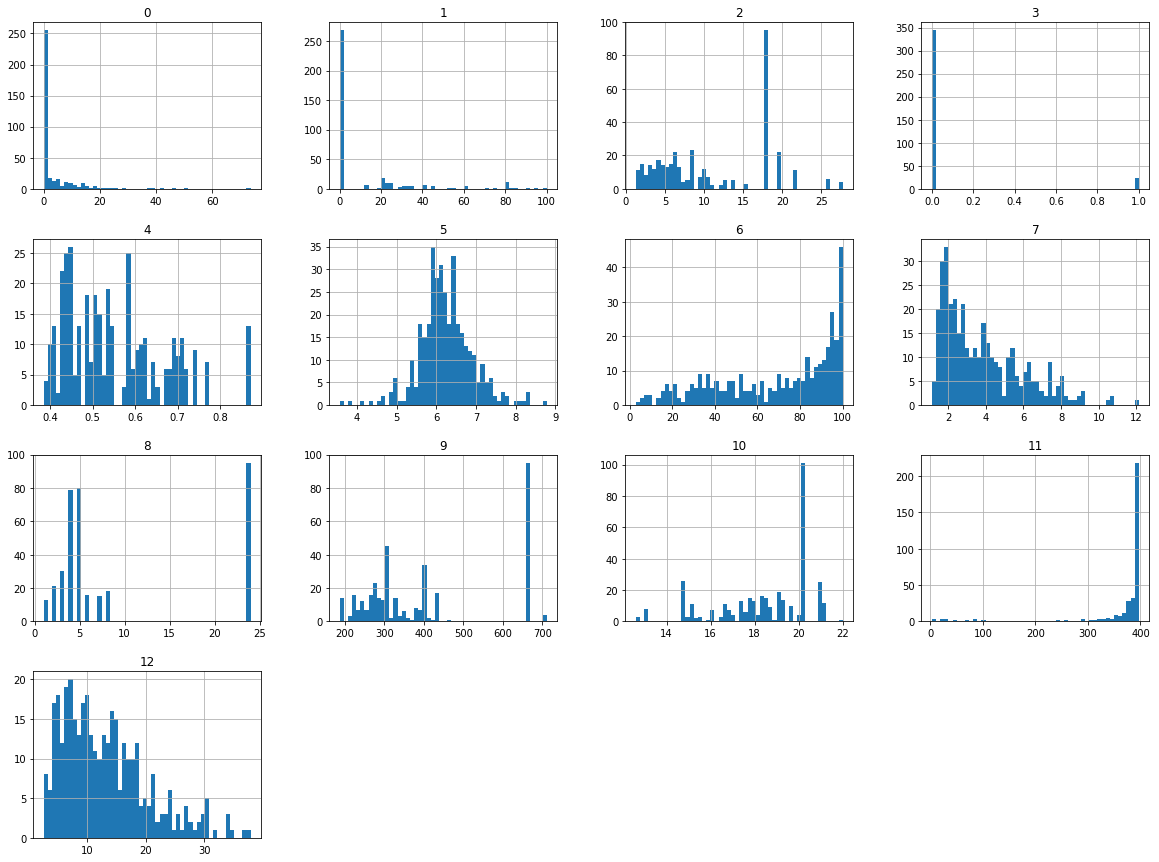

In [115]:
dataframe.hist(bins=50, figsize=(20,15))